In [1]:
# In Linear and Logistic Regression, the model can only and only understand numbers

In [2]:
# EDA --> Understand the data
# Data Cleaning --> Null values, Outliers
# Encoding --> Converting the object data type to numeric
# Label Encoding, One-hot Encoding
# VIF --> Variance Inflation Factor(Multicollinearity) -->
# Import the libraries
# Train the model
# Test the model
# Accuracy score, classification Report

In [3]:
# Kmeans Clustering
# PCA
# LDA
# SVD
# Time Series

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore all the warnings that appear after you execute a code

In [5]:
data=pd.read_csv('bank-additional-full.csv', sep = ';') # utf encoding as all the values in the csv dataset are separated by ';'

In [6]:
data.head()
# y--> no--> did not buy insurance
# yes---> bought it

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

Class Imbalance: As mentioned, the class 'no' is highly dominant, with 36,556 instances, while the class 'yes' has only 4,640 instances. This imbalance can lead to biased model performance, where the model may perform well in predicting the majority class ('no') but poorly on the minority class ('yes').

In [8]:
# If the target variable is having a continous data --> regression models
# Linear Regresssion, Decision Tree Regressor, Random Forest Regressor, SVM Regressor
# If the target variable is having a categorical data --> Classification models
# Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes Classifier, SVM Classifier

In [9]:
data.shape  # The no. of rows and columns present in the dataset

(41199, 21)

In [10]:
data.describe() # Statistical analylis

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.dtypes # data type of each and every column

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
data.shape

(41199, 21)

In [13]:
data.info() # total count of non-null values along with data type for each and evry column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [14]:
# Optional step

data['y'] = data['y'].replace({'yes': 1, 'no': 0})
data['y'] = data['y'].astype('object')

In [15]:
data['y'].value_counts()

0.0    36556
1.0     4640
Name: y, dtype: int64

In [16]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [17]:
# In linear and logistic regression models, we need to treat the outliers and the null values

In [18]:
data.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [19]:
# Null values
# dtype == object --> replace the null values with mode
# dtype == int/float --> replace the null values with mean/median
# If outliers are present --> Median
# If outliers are not present --> Mean

In [20]:
data.describe(include='all')
# Includes categorical values too and 'top' row gives the mode of the categorical column in case we want to replace the mode NULL values with mode

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41195.000000,41194,41194,41194,41195,41196,41195,41195,41196,41196,...,41196.000000,41196.000000,41196.000000,41194,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000,41196.0
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36556.0
mean,40.030319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567676,962.482547,0.173124,NaN,0.081656,93.575867,-40.504600,3.620787,5166.996405,NaN
std,10.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769751,186.893451,0.494987,NaN,1.570894,0.578999,4.629972,1.734655,72.300104,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [21]:
data['job'].mode() # An example to calculate the mode of a column

0    admin.
Name: job, dtype: object

In [22]:
#outliers

In [23]:
data.duplicated().sum()
data = data.drop_duplicates()

<Axes: xlabel='age'>

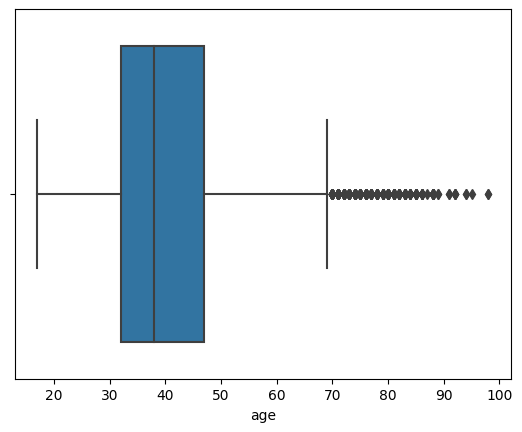

In [24]:
import seaborn as sns
sns.boxplot(x=data['age'])

In [25]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [27]:
import matplotlib.pyplot as plt

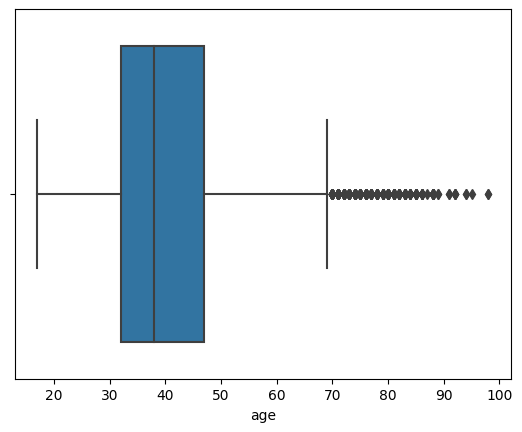

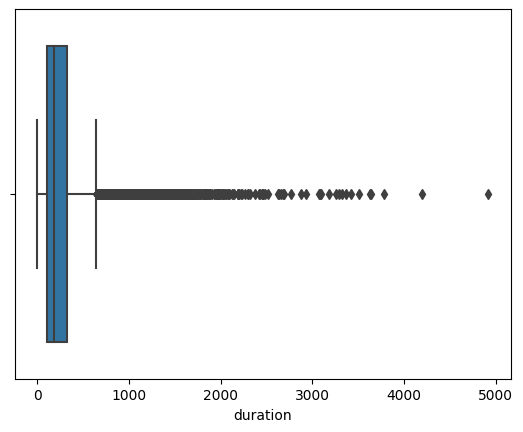

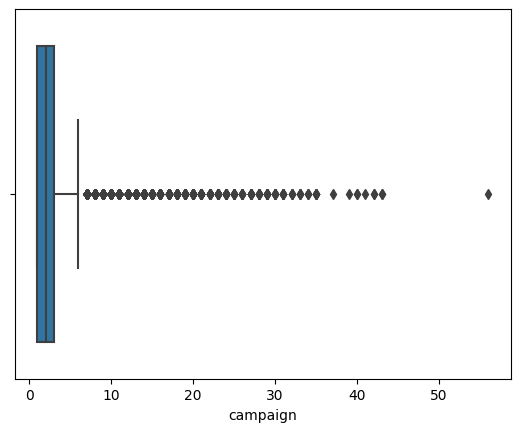

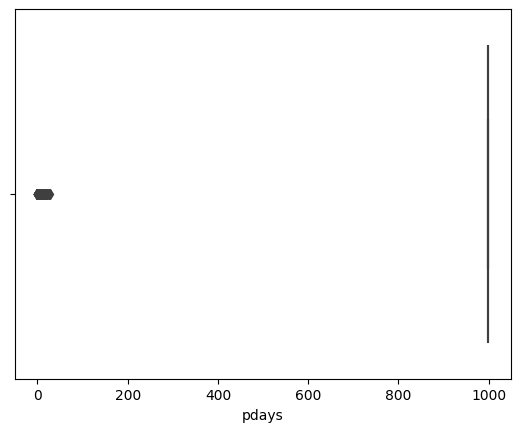

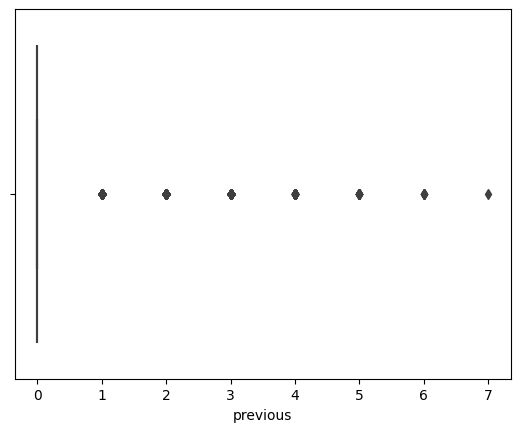

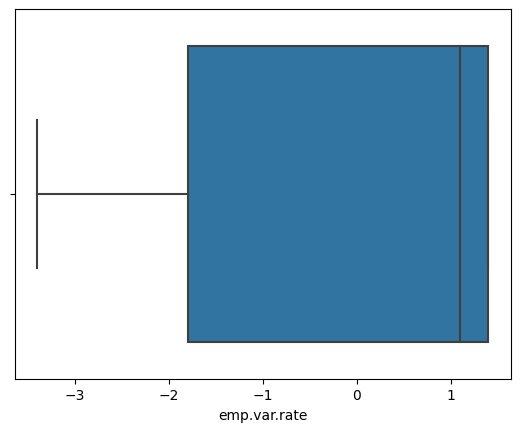

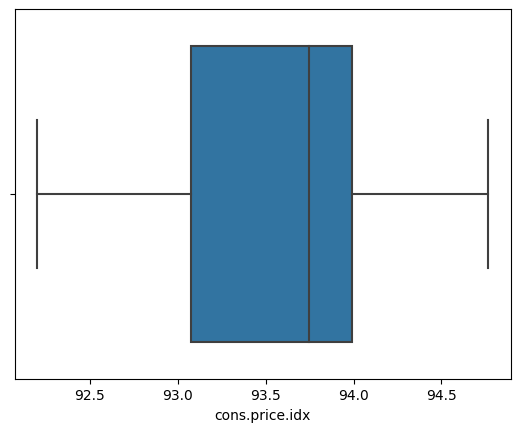

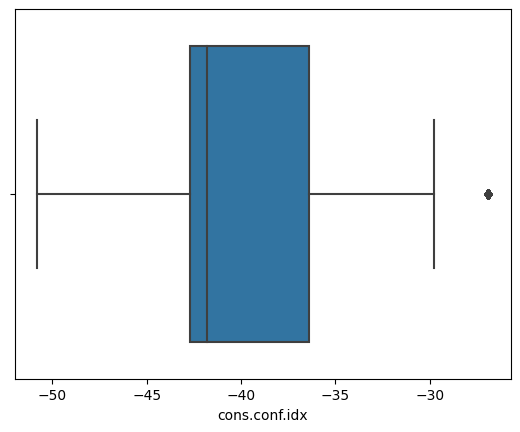

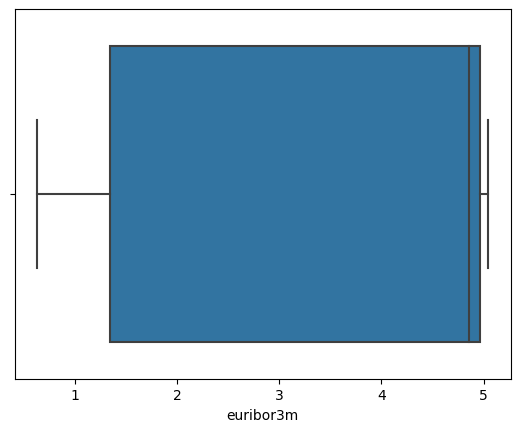

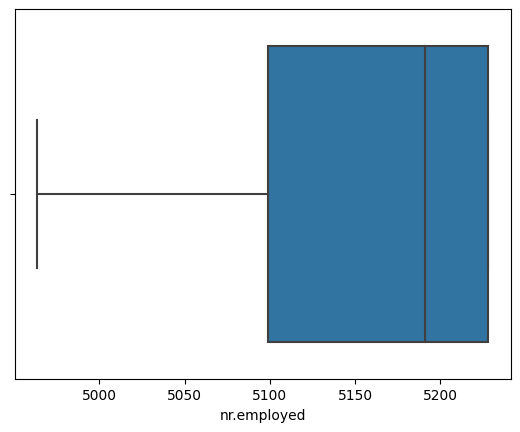

In [28]:
for i in col_list:
    if(data[i].dtype!='object'):
        plt.figure()
        sns.boxplot(x=data[i])

<Axes: xlabel='duration'>

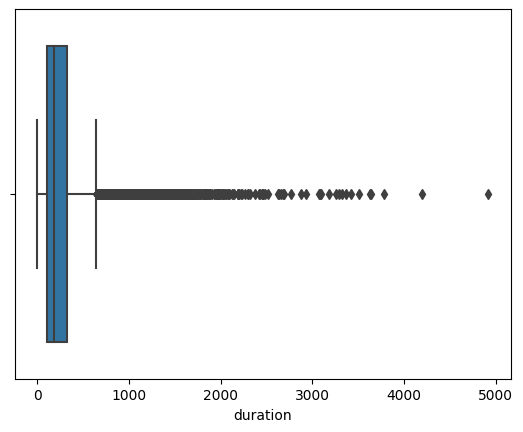

In [29]:
sns.boxplot(x=data['duration'])

In [30]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41182.000000,41183.000000,41183.000000,41183.00000,41183.000000,41183.000000,41182.000000,41183.000000,41183.000000,41183.000000
mean,40.029236,258.312532,2.567953,962.47102,0.173154,0.081721,93.575893,-40.504614,3.620853,5167.000291
std,10.430035,259.283404,2.770089,186.92182,0.495040,1.570825,0.578975,4.629413,1.734619,72.293884
min,17.000000,0.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.00000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.00000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.00000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
# There are two ways for treating the outliers
# One way is to remove the outliers column-wise
# The second way is to remove the outliers all at once for every numerical column

In [32]:
# Gerneralised formula
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [33]:
# data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR)).any(axis =1)]
# Lower limit = Q1 - 1.5*IQR
# Upper Limit = Q3 + 1.5*IQR

In [34]:
# ~ --> Negation operator --> It provides the exact opposite of the condition mentioned
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # axis = 1 --> column wise
# axis = 0 --> row wise

In [35]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


In [36]:
data.shape  # Outliers are treated

(30350, 21)

In [37]:
data.columns  # fetch out all the column names present in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
col_list = list(data.columns) #Type casting

In [39]:
col_list.remove('y')

In [40]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [41]:
data['age'].mode()[0]

31.0

In [42]:
for i in col_list:
    if data[i].dtypes=='object':
        #print('ob')
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        #print('num')
        data[i] = data[i].fillna(data[i].mean())
# If the column is a numeric column --> Replace the null values with mean, if outliers are treated, otherwise
# replace with median

In [43]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 1
dtype: int64

In [44]:
# Binning --> Grouping different value counts

In [45]:
bins = [10, 25, 50, 100]
data['age'] = pd.cut(data['age'], bins) # cut()--> for only binning purposes
data['age'] = data.age.astype(str)
# '10-25'  --> Label Encoding --> 0
# '25-50'  --> Label Encoding --> 1
# '50-100' --> Label Encoding --> 2

In [46]:
data['age'].unique() # all the unique values

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [47]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
5,"(25, 50]",services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
6,"(50, 100]",admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
7,"(25, 50]",blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
8,"(10, 25]",technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
9,"(10, 25]",services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


In [48]:
# Label encoding --> The object data is converted into numeric data
# the conversion values will be according to alphabetical order
# job --> 2, admin --> 0 , banker --> 1
# age
# 10-25,  25-50,  50-100
#  0        1        2

In [49]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

In [50]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


In [52]:
# We are performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
    data[i]=le.fit_transform(data[i]) # fit --> feed the data, transform --> convert the data into labels

In [53]:
# Labels are decided based upon their alphabetical order

In [54]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0


In [55]:
# Linear Regression, Logistic Regression --> We have to pass only numbers

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30349 entries, 0 to 41186
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           30349 non-null  int64  
 1   job           30349 non-null  int64  
 2   marital       30349 non-null  int64  
 3   education     30349 non-null  int64  
 4   default       30349 non-null  int64  
 5   housing       30349 non-null  int64  
 6   loan          30349 non-null  int64  
 7   contact       30349 non-null  int64  
 8   month         30349 non-null  int64  
 9   day_of_week   30349 non-null  int64  
 10  duration      30349 non-null  float64
 11  campaign      30349 non-null  float64
 12  emp.var.rate  30349 non-null  float64
 13  y             30349 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 3.5+ MB


In [92]:
data = data.dropna(subset=['y'])
data['y'] = data['y'].astype('object')

In [58]:
# VIF is used as a data preprocessing technique.
# It checks for whather multicollinearity is present in the independent columns or not.
# If a column is having an effect on other columns --> multicollinearity
# If multicollinearity is present within an independent column, we cannot truly refer that column as an independent.

In [59]:
# Multicollinerity --> When we compare the relationship of all the columns with all the other columns at once
# VIF --> Variance Inflation Factor
# VIF helps us to reduce the multicollinearity among the independent variables
# VIF = 1 --> Variables are not multicorrelated
# VIF < 6 --> vARIABLES ARE MODERATELY multicorrelated --> Accepted
# VIF = More than 6 --> Variables are highly correlated, and we drop those columns

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [94]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [95]:
X=data[col_list]
X
#independent

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1
1,2,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1
2,1,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1
3,1,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1
4,2,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1,0,1,6,0,0,0,0,7,0,254.0,2.0,-1.1
41181,1,0,1,6,0,2,0,0,7,0,281.0,1.0,-1.1
41184,1,1,1,5,0,0,0,0,7,0,383.0,1.0,-1.1
41185,2,5,1,6,0,2,0,0,7,0,189.0,2.0,-1.1


In [96]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'emp.var.rate'],
      dtype='object')

In [64]:
# For calculating VIF, we only need to pass the values present inside the column, not the column names

In [97]:
vif_data = pd.DataFrame() # Creating a new data frame
vif_data["feature"] = X.columns # adding a column- feature which will contain all the column names
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,5.885368
1,job,2.048744
2,marital,4.109659
3,education,3.947284
4,default,1.396172
5,housing,2.109266
6,loan,1.202322
7,contact,2.483294
8,month,5.136565
9,day_of_week,2.893569


In [98]:
data=data.drop(['pdays'], axis = 1) # axis = 1 --> column-wise

KeyError: ignored

In [67]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature           VIF
0              age      8.703379
1              job      2.095017
2          marital      5.200175
3        education      4.459709
4          default      1.410685
5          housing      2.192863
6             loan      1.208359
7          contact      3.589913
8            month      7.817808
9      day_of_week      3.105911
10        duration      3.172466
11        campaign      3.620942
12        previous           NaN
13        poutcome           NaN
14    emp.var.rate     41.967862
15  cons.price.idx  51249.110371
16   cons.conf.idx    160.358524
17       euribor3m    439.046801
18     nr.employed  58399.467532


In [68]:
data=data.drop(['nr.employed'], axis = 1)

In [69]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature         VIF
0              age    8.703319
1              job    2.094975
2          marital    5.199489
3        education    4.459706
4          default    1.409521
5          housing    2.192245
6             loan    1.208258
7          contact    2.750327
8            month    6.753022
9      day_of_week    3.105288
10        duration    3.163115
11        campaign    3.609280
12        previous         NaN
13        poutcome         NaN
14    emp.var.rate   28.396756
15  cons.price.idx  416.179129
16   cons.conf.idx  141.727104
17       euribor3m  203.178621


In [70]:
data=data.drop(['cons.price.idx'], axis = 1)

In [71]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0             age   8.405034
1             job   2.086059
2         marital   5.077141
3       education   4.387070
4         default   1.406896
5         housing   2.187421
6            loan   1.207627
7         contact   2.505627
8           month   6.416208
9     day_of_week   3.082374
10       duration   3.124246
11       campaign   3.573002
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate  14.554429
15  cons.conf.idx  46.934569
16      euribor3m  83.509351


In [72]:
data=data.drop(['euribor3m'], axis = 1)

In [73]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0             age   7.810483
1             job   2.075306
2         marital   4.972828
3       education   4.198493
4         default   1.406728
5         housing   2.176878
6            loan   1.207360
7         contact   2.495918
8           month   5.783656
9     day_of_week   3.034257
10       duration   3.098629
11       campaign   3.565367
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate   1.409710
15  cons.conf.idx  23.711578


In [74]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [75]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0            age  5.885368
1            job  2.048744
2        marital  4.109659
3      education  3.947284
4        default  1.396172
5        housing  2.109266
6           loan  1.202322
7        contact  2.483294
8          month  5.136565
9    day_of_week  2.893569
10      duration  2.925011
11      campaign  3.253691
12      previous       NaN
13      poutcome       NaN
14  emp.var.rate  1.406007


In [76]:
data=data.drop(['previous','poutcome'], axis = 1)  # Removing the columns because of Nan as the VIF

In [77]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0            age  5.885368
1            job  2.048744
2        marital  4.109659
3      education  3.947284
4        default  1.396172
5        housing  2.109266
6           loan  1.202322
7        contact  2.483294
8          month  5.136565
9    day_of_week  2.893569
10      duration  2.925011
11      campaign  3.253691
12  emp.var.rate  1.406007


In [78]:
vif_data.feature

0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12    emp.var.rate
Name: feature, dtype: object

In [79]:
Ind_Features = list(vif_data.feature)
Ind_Features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [80]:
df_ind = data[Ind_Features]  # All the truly independent columns
df_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1
1,2,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1
2,1,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1
3,1,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1
4,2,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1,0,1,6,0,0,0,0,7,0,254.0,2.0,-1.1
41181,1,0,1,6,0,2,0,0,7,0,281.0,1.0,-1.1
41184,1,1,1,5,0,0,0,0,7,0,383.0,1.0,-1.1
41185,2,5,1,6,0,2,0,0,7,0,189.0,2.0,-1.1


In [99]:
df_dep = data['y']
df_dep

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41180    0.0
41181    1.0
41184    0.0
41185    0.0
41186    1.0
Name: y, Length: 30349, dtype: object

In [100]:
df_ind.dtypes

age               int64
job               int64
marital           int64
education         int64
default           int64
housing           int64
loan              int64
contact           int64
month             int64
day_of_week       int64
duration        float64
campaign        float64
emp.var.rate    float64
dtype: object

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.25, random_state=100)
# random state --> Select the data based upon the pattern

In [102]:
x_train.shape

(22761, 13)

In [103]:
x_test.shape

(7588, 13)

In [104]:
y_train.shape

(22761,)

In [108]:
unique_values = y_train.unique()
print("Unique values in y_train:", unique_values)

Unique values in y_train: [0.0 1.0]


In [110]:
y_train = y_train.astype(int)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logisticRegr = LogisticRegression()

In [111]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [112]:
test_pred = logisticRegr.predict(x_test)

In [113]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
35770,0,0,2,3,0,0,0,0,6,1,16.0,5.0,-1.8
5116,1,1,1,0,1,0,0,1,6,0,488.0,1.0,1.1
14146,1,2,1,6,1,2,0,0,3,1,151.0,2.0,1.4
7562,1,1,2,2,1,0,0,1,6,0,91.0,2.0,1.1
11096,1,9,2,5,1,0,2,1,4,2,127.0,1.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,2,0,0,2,1,6,4,109.0,1.0,1.1
32011,1,0,1,1,0,2,0,1,6,2,123.0,3.0,-1.8
22763,2,5,1,2,0,2,0,0,1,1,337.0,4.0,1.4
8850,1,6,2,6,0,0,0,1,4,2,39.0,1.0,1.4


In [115]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.944302,0.055698
1,0.953548,0.046452
2,0.991142,0.008858
3,0.997991,0.002009
4,0.998574,0.001426
...,...,...
7583,0.995263,0.004737
7584,0.956716,0.043284
7585,0.986816,0.013184
7586,0.996972,0.003028


In [ ]:
# Classification model --> accuracy_score(), confusion matrix, classification report

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
'''
Predicted   P	N
                1  0
                y  n
Actual  1  Py 	TP	FP
        0 Nn  	FN	TN

          #Sensitivity=TP/TP+FN  # pREDICTION --> tRUE, 1
          #Specificity=TN/TN+FP    pREDICTION --> tRUE, 0
'''  # accuracy ---> (  TP+TN)/(Total)

In [122]:
# Convert 'test_pred' to a pandas Series
test_pred_series = pd.Series(test_pred)

# Convert 'y_test' to a NumPy array with valid binary values (0s and 1s)
y_test = y_test.astype(int)

In [123]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[7101,   85],
       [ 339,   63]])

In [124]:
accuracy_score(y_test,test_pred)

0.9441222983658408

model's accuracy is approximately 94.41%, which means it correctly predicts the class in nearly 94.41% of the cases.

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7186
           1       0.43      0.16      0.23       402

    accuracy                           0.94      7588
   macro avg       0.69      0.57      0.60      7588
weighted avg       0.93      0.94      0.93      7588



In [126]:
accuracy_score(y_test, test_pred)

0.9441222983658408